# Exponential Distribution in Python

Date: 2020-10-31

## Scenario

Some of the sky mermaids are early risers.
They are also a vocal bunch who often contact their local MP to complain as soon as they wake up.
On a typical day, the MP receives approximately 5 complaints from the sky mermaids between 4am and 5am.

The MP decides to start work early so they can deal with the complaints as they arrive, and wishes to model the waiting time between the arrival of complaints.

-----

## Questions

**(a)** State the model that best describes the waiting time between complaints for the MP, if they were to log on to their computer at 4am.

**(b)** Plot the distribution.

**(c)** The MP becomes stressed if they receive a complaint whilst still answering the previous complaint.
They estimate it takes them on average 4 minutes to answer a complaint.

What is the probability they will receive a complaint during the time they are answering another complaint?

**(d)** During the hour, the MP plans to make themselves some breakfast.
They estimate it will take them 12 minutes to make a bacon sandwich.

Assuming they begin to make the sandwich immediately after receiving a complaint, what is the probability they do not receive another complaint during the time they are away cooking breakfast?

-----

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

## (a)

Let $T$ be a random variable that represents the waiting time between successive complaints.
The MP receives on average 5 complaints between 4am and 5am.
Therefore $T$ is modelled by the **exponential distribution** with parameter $\lambda=5$, so $T \sim M(5)$.

Note that parameter `scale` should be set to $1/\lambda$.

In [2]:
t = stats.expon(scale=1/5)

## (b)

In [3]:
# define the range
range_t = np.arange(start=0, stop=1, step=0.001)

In [4]:
# construct the df
df_earlyComplaints = pd.DataFrame(data=range_t, columns={'t'})
df_earlyComplaints['f(t)'] = t.pdf(x=range_t)

Plot the distribution.

[Text(0.5, 1.0, 'Probability distribution: M(5)')]

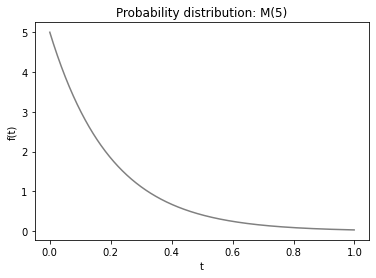

In [5]:
ax1 = sns.lineplot(data=df_earlyComplaints,
                   x='t',
                   y='f(t)',
                   color="grey")

ax1.set(title="Probability distribution: M(5)")

## (c)

The probability $P(X \leq x)$ for an exponential distribution is

$$
P(X \leq x) = F(x) = 1 - e^{-\lambda x}.
$$

So the probability the MP will receive a complaint during the time they answering another complaint, given that it takes them

$$
4 \text{ minutes} = \frac{4}{60} = \frac{1}{15} \text{ hours}
$$

to answer a complaint is

$$
P\bigg( T < \frac{1}{15} \bigg) = 1 - e^{-\frac{1}{3}} = \ldots
$$

In [6]:
t.cdf(x=1/15)

0.28346868942621073

## (d)

The probability they will not receive a complaint during the time they are away making breakfast, given that it takes them

$$
12 \text{ minutes} = \frac{12}{60} = \frac{1}{5} \text{ hours}
$$

to make a bacon sandwich is

$$
P\bigg( T > \frac{1}{5} \bigg) = 1 - F\bigg( \frac{1}{5} \bigg) = 1 - (1 - e^{-\frac{5}{5}}) = e^{-1} = \ldots
$$

In [7]:
t.sf(x=0.2)

0.36787944117144233